### dataset download link: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

# importing neccessary packages

In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import text_hammer as th
import os

# utillity functions

# removing emails, links, special characters and accenated chars for text preprocessing

In [2]:
def text_clean(df,col_name):
    column=col_name
    df[column]=df[column].apply(lambda x:th.remove_emails(x))
    df[column]=df[column].apply(lambda x:th.remove_html_tags(x))
    df[column]=df[column].apply(lambda x:th.remove_special_chars(x))
    df[column]=df[column].apply(lambda x:th.remove_accented_chars(x))
    return df

# mapping each class to it's numerical index

In [3]:
def class_to_index(y):
    label_dict={}
    labels=y.unique()
    for index, possible_label in enumerate(labels):
        label_dict[possible_label] = index
    return label_dict

In [4]:
def replacing_class_with_index(df,label):
    
    label_dict=class_to_index(df[label])
    df[label]=df[label].replace(label_dict)
    return df

### custom undersampler

In [5]:
def custom_undersampler(df_full):
     
    list_of_undersampled_classes=[]
    #  assigning least repeated class value to a variable
    x=min(df_full['Emotion'].value_counts())
    
    for i in set(df_full['Emotion']):
        
        #collecting each class 
        single_class=df_full[df_full["Emotion"] == i]
        # randomly sampling the records with least repeated class value
        sampled_class=single_class.sample(n =x)
        #appending each dataframe to list to be latter concatenated
        list_of_undersampled_classes.append(sampled_class)
    return list_of_undersampled_classes
        

# loading dataset

In [6]:
df_train = pd.read_csv(r'C:\Users\ahmed hatem\Downloads\emotions data NLP\train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv(r'C:\Users\ahmed hatem\Downloads\emotions data NLP\val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv(r'C:\Users\ahmed hatem\Downloads\emotions data NLP\test.txt', names=['Text', 'Emotion'], sep=';')

# concatinating all train,test and validate 

In [9]:
df_full=pd.concat([df_train,df_val,df_test],axis=0)

In [10]:
df_full

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


# the dataset has 6 categories so removing the smallest class to resemble the BBC news dataset

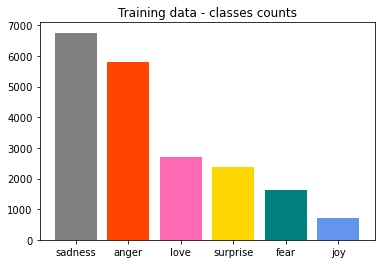

In [11]:
colors = np.array(["gray", 'orangered', 'hotpink', 'gold', 'teal', 'cornflowerblue'])

plt.bar(df_full['Emotion'].unique(),height=df_full['Emotion'].value_counts(), color=colors)
plt.title("Training data - classes counts")
plt.show()

# since joy is the least class in numbers removing it will result in a five classes classification problem similar to BBC news

In [12]:
df_full = df_full.loc[df_full['Emotion'] !='joy' ]

# applying target preprocessing

In [13]:
df_full=replacing_class_with_index(df_full,'Emotion')

<ipython-input-4-76fffd3bebdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label]=df[label].replace(label_dict)


In [27]:
df_train=df_full[:12000]
df_test=df_full[12000:]

In [29]:
list_of_undersampled_classes=custom_undersampler(df_train)

In [30]:
list_of_undersampled_classes = pd.concat(list_of_undersampled_classes)

In [31]:
list_of_undersampled_classes

,Text,Emotion
9364,i feel this about my movies he says the fact t...,0
2767,i cry about feeling shitty i cry because dad m...,0
907,i like the three finger hands those simple det...,0
12366,i feel for pete but i also admire the fact tha...,0
1457,i know i should write something but i m feelin...,0
...,...,...
2002,i signed the petition and knowing that it will...,4
6605,i always feel afraid of telling people because...,4
14104,i heard it somehow it brings me good feeling s...,4
3918,i confess to feeling a bit nervous now though ...,4


# applying text cleaning 

In [32]:
df_train=text_clean(list_of_undersampled_classes,'Text')
df_test=text_clean(df_test,'Text')

<ipython-input-2-9ee52f778996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].apply(lambda x:th.remove_emails(x))
<ipython-input-2-9ee52f778996>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].apply(lambda x:th.remove_html_tags(x))
<ipython-input-2-9ee52f778996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

# splitting the data again into train and validate

In [33]:
X_train, X_val, y_train, y_val = train_test_split(df_train['Text'], df_train['Emotion'], test_size=0.33,stratify=df_train['Emotion'])

In [36]:
y_val.value_counts()

3    217
1    217
0    217
4    216
2    216
Name: Emotion, dtype: int64

# merging each x and y for model input

In [37]:
train=pd.merge(X_train,pd.DataFrame(y_train),right_index=True,left_index=True)
validate=pd.merge(X_val,pd.DataFrame(y_val),right_index=True,left_index=True)


In [38]:
train.to_csv(r'train.csv')

In [39]:
validate.to_csv(r'validate.csv')

In [40]:
df_test.to_csv(r'test.csv')